In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/base de dados/dataset_balanceado_limpo.csv', encoding='utf-8', sep=',')

Mounted at /content/drive


In [ ]:
def normalize_dataframe(df):
    for coluna in df.columns:
        if df[coluna].dtype != 'category':  # Verifica se a coluna é numérica
            max_valor = df[coluna].max()
            df[coluna] = df[coluna] / max_valor  # Divide todos os valores da coluna pelo máximo

In [ ]:
labels = df[' Label']

data = df.drop(columns=[' Label'])

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
y = to_categorical(labels_encoded, num_classes=7)

In [ ]:
data = data.drop(columns=['Bwd Avg Bulk Rate', ' Flow Packets/s', ' Bwd Avg Packets/Bulk', ' Bwd Avg Bytes/Bulk', ' Fwd Avg Bulk Rate', ' Fwd Avg Packets/Bulk', 'Fwd Avg Bytes/Bulk', ' ECE Flag Count', ' PSH Flag Count', 'FIN Flag Count', ' Bwd URG Flags', ' Fwd URG Flags', ' Bwd PSH Flags'], axis=1)
indices_selecionados = [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 32, 34, 35, 36, 37, 38, 41, 43, 44, 47, 55, 56, 58, 66, 67]
data = data.iloc[:, indices_selecionados]

In [ ]:
normalize_dataframe(data)

In [ ]:
print(y)
unique_labels = np.unique(labels_encoded)

print("Ordem dos rótulos:", unique_labels)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
Ordem dos rótulos: [0 1 2 3 4 5 6]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=20)

model = Sequential()
model.add(Dense(256, activation='softmax', input_shape=(data.shape[1],)))
model.add(Dense(256, activation='softmax'))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

historico = model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

y_pred = model.predict(X_test)

print('Acuracia:', accuracy)
print('loss', loss)

Epoch 1/20
15715/15715 [==============================] - 123s 8ms/step - loss: 0.3380 - categorical_accuracy: 0.8098 - val_loss: 0.3063 - val_categorical_accuracy: 0.8250
Epoch 2/20
15715/15715 [==============================] - 106s 7ms/step - loss: 0.2980 - categorical_accuracy: 0.8319 - val_loss: 0.2916 - val_categorical_accuracy: 0.8085
Epoch 3/20
15715/15715 [==============================] - 105s 7ms/step - loss: 0.2928 - categorical_accuracy: 0.8357 - val_loss: 0.2901 - val_categorical_accuracy: 0.8329
Epoch 4/20
15715/15715 [==============================] - 103s 7ms/step - loss: 0.2862 - categorical_accuracy: 0.8415 - val_loss: 0.2850 - val_categorical_accuracy: 0.8674
Epoch 5/20
15715/15715 [==============================] - 108s 7ms/step - loss: 0.2693 - categorical_accuracy: 0.8600 - val_loss: 0.2643 - val_categorical_accuracy: 0.8650
Epoch 6/20
15715/15715 [==============================] - 107s 7ms/step - loss: 0.2619 - categorical_accuracy: 0.8658 - val_loss: 0.2895 - v

Matriz de Confusão:
[[ 5612     0     0     0     1     0     0]
 [    0 18957     0     0     0     0     0]
 [    7  1046 19624   196   215    12  1111]
 [    3     4     1  9047  1509     0     1]
 [    1     9    15 10806 18439    19     2]
 [    1     0     1     0     5 19937     2]
 [    3     0   210     2     1     6 18911]]


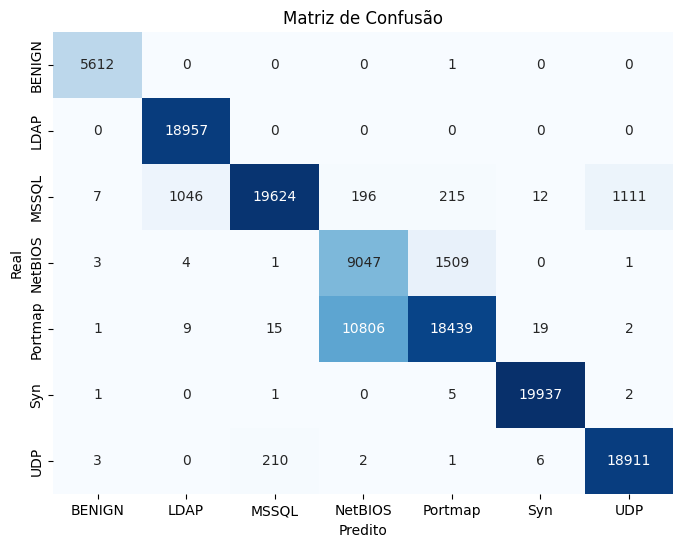

In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix( y_pred_labels, y_test_labels)

print("Matriz de Confusão:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
unique_values, counts = np.unique(y_pred_labels, return_counts=True)

contagem_por_classe = dict(zip(unique_values, counts))

porcentagem_por_classe = {classe: (conf_matrix[i, i] / contagem_por_classe[classe]) * 100
                           for i, classe in enumerate(unique_values)}

print("Porcentagem de acertos por classe:")
print(porcentagem_por_classe)

Porcentagem de acertos por classe:
{0: 99.98218421521467, 1: 100.0, 2: 88.35261807212642, 3: 85.63180312352105, 4: 62.951077122665666, 5: 99.95487817106186, 6: 98.8397010400878}


In [ ]:
drive.mount('/content/drive')
df_teste = pd.read_csv('/content/drive/MyDrive/base de dados/dataset_teste.csv', encoding='utf-8', sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels_teste = df_teste[' Label']

data_teste = df_teste.drop(columns=[' Label'])

label_encoder = LabelEncoder()
labels_encoded_teste = label_encoder.fit_transform(labels_teste)
y_teste = to_categorical(labels_encoded_teste, num_classes=7)

In [ ]:
data_teste = data_teste.drop(columns=['Bwd Avg Bulk Rate', ' Flow Packets/s', ' Bwd Avg Packets/Bulk', ' Bwd Avg Bytes/Bulk', ' Fwd Avg Bulk Rate', ' Fwd Avg Packets/Bulk', 'Fwd Avg Bytes/Bulk', ' ECE Flag Count', ' PSH Flag Count', 'FIN Flag Count', ' Bwd URG Flags', ' Fwd URG Flags', ' Bwd PSH Flags'], axis=1)
indices_selecionados = [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 32, 34, 35, 36, 37, 38, 41, 43, 44, 47, 55, 56, 58, 66, 67]
data_teste = data_teste.iloc[:, indices_selecionados]

In [ ]:
normalize_dataframe(data_teste)

<ipython-input-3-629f5b553942>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = df[coluna] / max_valor  # Divide todos os valores da coluna pelo máximo


In [ ]:
y_pred_teste = model.predict(data_teste)

_, accuracy = model.evaluate(data_teste, y_teste, verbose=1)

print(f'Accuracy on Test Set: {accuracy}')

15625/15625 [==============================] - 44s 3ms/step - loss: 0.5962 - categorical_accuracy: 0.7779
Accuracy on Test Set: 0.7778559923171997


Matriz de Confusão:
[[  6879      1      0      1     11      3      4]
 [     0   9256     86      0      3      0      0]
 [     0    528 110624    963   1103     11  37041]
 [     4      1      3  37799   5771      1      0]
 [     2    137   2376  61139  88314      7    140]
 [     0      5    782      0     58  99953    682]
 [     1      3    183      6     13      3  36103]]


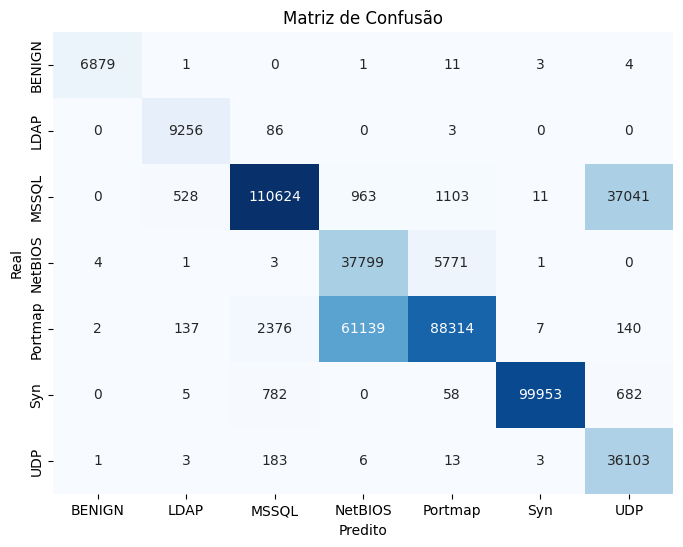

In [ ]:
y_pred_teste = np.argmax(y_pred_teste, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_pred_teste, labels_encoded_teste)

print("Matriz de Confusão:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
unique_values, counts = np.unique(y_pred_teste, return_counts=True)

contagem_por_classe = dict(zip(unique_values, counts))

porcentagem_por_classe = {classe: (conf_matrix[i, i] / contagem_por_classe[classe]) * 100
                           for i, classe in enumerate(unique_values)}

print("Porcentagem de acertos por classe:")
print(porcentagem_por_classe)

Porcentagem de acertos por classe:
{0: 99.71010291346572, 1: 99.04761904761905, 2: 73.61682305184002, 3: 86.73673099428623, 4: 58.05739078986293, 5: 98.49527000394166, 6: 99.42443269442609}
